## Loading basic Python and R imports

In [80]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Testing Hypotheses

In [81]:
%%R

require('tidyverse')
require('ggforce')


# turn am into a factor
mtcars$am <- factor(mtcars$am, labels=c('automatic', 'manual'))
mtcars$vs <- factor(mtcars$vs, labels=c('v-shaped', 'straight'))
mtcars$cyl <- factor(mtcars$cyl)


my_theme <- theme_minimal() + 
    theme(plot.title = element_text(size=25),
          legend.position='bottom',
          legend.title=element_blank())


R[write to console]: Loading required package: ggforce



## Part 1 | mtcars

## $H_{0}$ = Null Hypothesis: 

- Automatic cars and manual cars are, on average, equally fuel efficient

in other words

- Automatic cars and manual cars come from **the same** distribution.

in other words

- One mean will do a better job of describing these two subsets of data than two (or more) means 

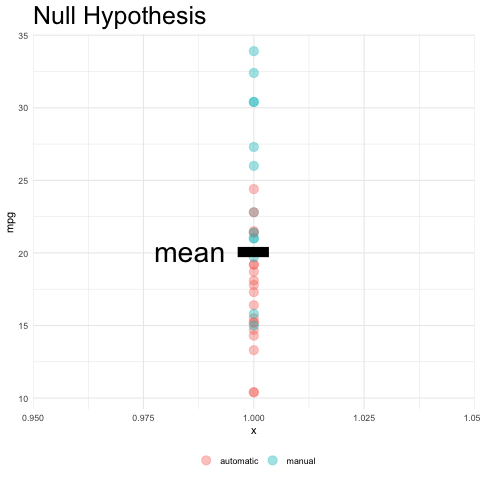

In [82]:
%%R -o mtcars

ggplot(mtcars) +
    aes(x=1, y=mpg, color=factor(am)) +
    geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    my_theme +
    labs(title="Null Hypothesis")

In [83]:
# python cell
df = mtcars[['mpg']]
df['mean'] = df.mpg.mean().round(2)
df['std']  = df.mpg.std().round(2)
df['error'] = df['mpg'] - df['mean']
df['z_score'] =  df['error'] / df['std']
df['sq_error'] = df['error'] ** 2


df.sort_values(by='sq_error', ascending=False).round(2).head()

,mpg,mean,std,error,z_score,sq_error
Toyota Corolla,33.9,20.09,6.03,13.81,2.29,190.72
Fiat 128,32.4,20.09,6.03,12.31,2.04,151.54
Honda Civic,30.4,20.09,6.03,10.31,1.71,106.30
Lotus Europa,30.4,20.09,6.03,10.31,1.71,106.30
Lincoln Continental,10.4,20.09,6.03,-9.69,-1.61,93.90


### Sum of squared errors
Sum of squared errors (SSE) = $\sum_{i=1}^{n}(x_i-y_i)^2$

In [84]:
print("Sum of squared errors (SSE) is", df.sq_error.sum().round(2))


Sum of squared errors (SSE) is 1126.05


### Mean of squared errors

MSE = $\frac{SSE}{N}$


In [85]:
print("Mean of squared errors (MSE) is", df.sq_error.mean().round(2))

Mean of squared errors (MSE) is 35.19


### Root mean squared error

RMSE = $\sqrt{MSE}$


In [86]:
print("Root mean squared error (RMSE) is", np.sqrt(df.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

Root mean squared error (RMSE) is 5.93 mpg


## Some other hypotheses

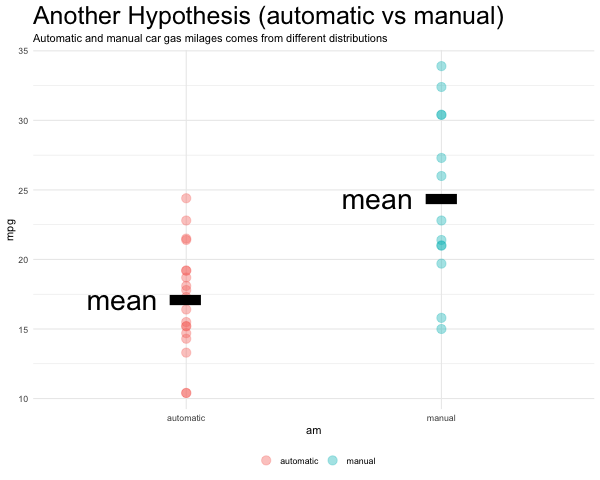

In [87]:
%%R -w 600


ggplot(mtcars) +
    aes(x=am, y=mpg, color=factor(am)) +
    geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    labs(title="Another Hypothesis (automatic vs manual)",
        subtitle="Automatic and manual car gas milages comes from different distributions") +
    my_theme

In [88]:
mean_mpg_by_am = pd.DataFrame(
    mtcars.groupby('am').mpg.mean()
).reset_index().round(1)

mean_mpg_by_am

,am,mpg
0,1,17.1
1,2,24.4


In [89]:
df_alt = mtcars[['mpg', 'am']]
df_alt = df_alt.merge(mean_mpg_by_am, on='am', how='inner', suffixes=('','_mean'))
df_alt['error'] = df_alt.mpg - df_alt.mpg_mean
df_alt['sq_error'] = df_alt['error'] ** 2
df_alt.head()

,mpg,am,mpg_mean,error,sq_error
0,21.0,2,24.4,-3.4,11.56
1,21.0,2,24.4,-3.4,11.56
2,22.8,2,24.4,-1.6,2.56
3,32.4,2,24.4,8.0,64.00
4,30.4,2,24.4,6.0,36.00


In [90]:
print("Sum of squared errors (SSE) is", df_alt.sq_error.sum().round(2))
print("Mean of squared errors (MSE) is", df_alt.sq_error.mean().round(2))
print("Root mean squared error (RMSE) is", np.sqrt(df_alt.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

Sum of squared errors (SSE) is 720.94
Mean of squared errors (MSE) is 22.53
Root mean squared error (RMSE) is 4.75 mpg


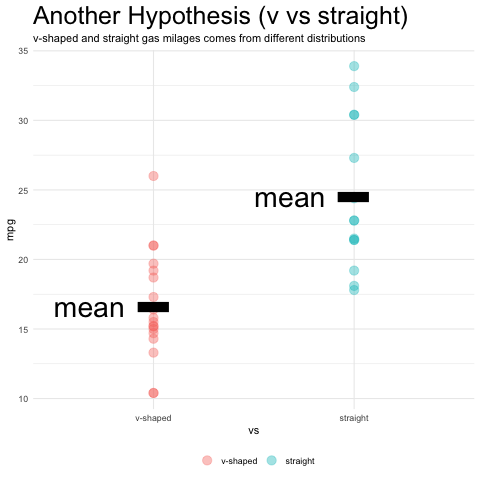

In [91]:
%%R 


ggplot(mtcars) +
    aes(x=vs, y=mpg, color=factor(vs)) +
    geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    labs(title="Another Hypothesis (v vs straight)",
        subtitle="v-shaped and straight gas milages comes from different distributions") +
    my_theme

In [92]:
mean_mpg_by_vs = pd.DataFrame(
    mtcars.groupby('vs').mpg.mean()
).reset_index().round(1)

mean_mpg_by_vs

,vs,mpg
0,1,16.6
1,2,24.6


In [93]:
df_alt_vs = mtcars[['mpg', 'vs']]
df_alt_vs = df_alt_vs.merge(mean_mpg_by_vs, on='vs', how='inner', suffixes=('','_mean'))
df_alt_vs['error'] = df_alt_vs.mpg - df_alt_vs.mpg_mean
df_alt_vs['sq_error'] = df_alt_vs['error'] ** 2
df_alt_vs.head()

,mpg,vs,mpg_mean,error,sq_error
0,21.0,1,16.6,4.4,19.36
1,21.0,1,16.6,4.4,19.36
2,18.7,1,16.6,2.1,4.41
3,14.3,1,16.6,-2.3,5.29
4,16.4,1,16.6,-0.2,0.04


In [94]:
print("Sum of squared errors (SSE) is", df_alt_vs.sq_error.sum().round(2))
print("Mean of squared errors (MSE) is", df_alt_vs.sq_error.mean().round(2))
print("Root mean squared error (RMSE) is", np.sqrt(df_alt_vs.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

Sum of squared errors (SSE) is 629.55
Mean of squared errors (MSE) is 19.67
Root mean squared error (RMSE) is 4.44 mpg


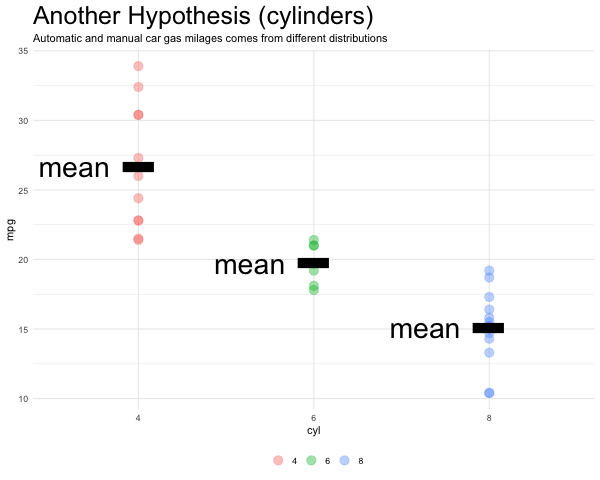

In [95]:
%%R -w 600


ggplot(mtcars) +
    aes(x=cyl, y=mpg, color=factor(cyl)) +
    geom_point(size=4, alpha=.4) +
    stat_summary(fun=mean, geom='text', hjust=1.4, aes(label='mean'), color='black', size=10) +
    stat_summary(fun=mean, shape='-', color='black', size=10) +
    labs(title="Another Hypothesis (cylinders)",
        subtitle="Automatic and manual car gas milages comes from different distributions") +
    my_theme

In [96]:
mean_mpg_by_cyl = pd.DataFrame(
    mtcars.groupby('cyl').mpg.mean()
).reset_index().round(1)

mean_mpg_by_cyl

,cyl,mpg
0,1,26.7
1,2,19.7
2,3,15.1


In [97]:
df_alt_cyl = mtcars[['mpg', 'cyl', 'am']]
df_alt_cyl = df_alt_cyl.merge(mean_mpg_by_cyl, on='cyl', how='inner', suffixes=('','_mean'))
df_alt_cyl['error'] = df_alt_cyl.mpg - df_alt_cyl.mpg_mean
df_alt_cyl['sq_error'] = df_alt_cyl['error'] ** 2
df_alt_cyl.head()

,mpg,cyl,am,mpg_mean,error,sq_error
0,21.0,2,2,19.7,1.3,1.69
1,21.0,2,2,19.7,1.3,1.69
2,21.4,2,1,19.7,1.7,2.89
3,18.1,2,1,19.7,-1.6,2.56
4,19.2,2,1,19.7,-0.5,0.25


In [98]:
print("Sum of squared errors (SSE) is", df_alt_cyl.sq_error.sum().round(2))
print("Mean of squared errors (MSE) is", df_alt_cyl.sq_error.mean().round(2))
print("Root mean squared error (RMSE) is", np.sqrt(df_alt_cyl.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

Sum of squared errors (SSE) is 301.29
Mean of squared errors (MSE) is 9.42
Root mean squared error (RMSE) is 3.07 mpg


## $H_{a}$ = Alternate Hypothesis: 

Note that the alternative hypothesis is just the hypothesis that says the null hypothesis is not true.

So it is that the data **does not** come from one mean, but it doesn't make any claims about what distributions the data does come from.

That is why we either

* Reject the null hypothesis 

or

* Fail to reject the null hypothesis

### Comparison

In [99]:

def summary_stats(df):
    print("Sum of squared errors (SSE) is", df.sq_error.sum().round(2))
    print("Mean of squared errors (MSE) is", df.sq_error.mean().round(2))
    print("Root mean squared error (RMSE) is", np.sqrt(df.sq_error.mean()).round(2), "mpg") # aka RMSD (like stdev, but for error)

print("Null Hypothesis")
summary_stats(df)

print("\nAlt Hypothesis 1 (am)")
summary_stats(df_alt)

print("\nAlt Hypothesis 2 (vs)")
summary_stats(df_alt_vs)

print("\nAlt Hypothesis 3 (cyl)")
summary_stats(df_alt_cyl)

Null Hypothesis
Sum of squared errors (SSE) is 1126.05
Mean of squared errors (MSE) is 35.19
Root mean squared error (RMSE) is 5.93 mpg

Alt Hypothesis 1 (am)
Sum of squared errors (SSE) is 720.94
Mean of squared errors (MSE) is 22.53
Root mean squared error (RMSE) is 4.75 mpg

Alt Hypothesis 2 (vs)
Sum of squared errors (SSE) is 629.55
Mean of squared errors (MSE) is 19.67
Root mean squared error (RMSE) is 4.44 mpg

Alt Hypothesis 3 (cyl)
Sum of squared errors (SSE) is 301.29
Mean of squared errors (MSE) is 9.42
Root mean squared error (RMSE) is 3.07 mpg


# ⚠️ Caution: Overfitting...

So is this the model with the best fit?

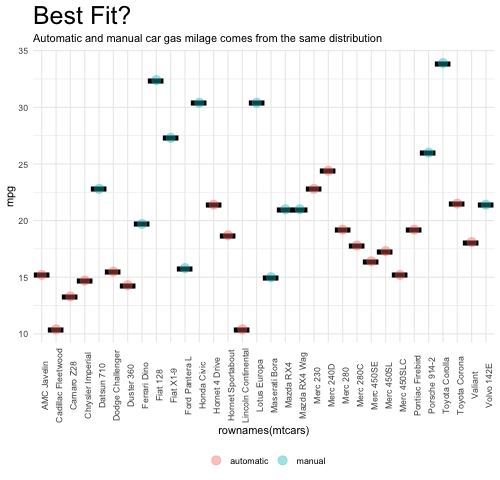

In [100]:
%%R -o mtcars -w 500

mtcars$am <- factor(mtcars$am, labels=c("automatic", "manual"))

ggplot(mtcars) +
    aes(x=rownames(mtcars), y=mpg, color=factor(am)) +
    geom_point(size=20, alpha=1, shape='-', color='black') +
    geom_point(size=4, alpha=.4) +
    labs(title="Best Fit?",
        subtitle="Automatic and manual car gas milage comes from the same distribution") +
    my_theme +
    theme(axis.text.x=element_text(angle=90))

In [101]:
print("Sum of squared errors (SSE) is 0 ")
print("Mean of squared errors (MSE) is 0")
print("Root mean squared error (RMSE) is 0")

Sum of squared errors (SSE) is 0 
Mean of squared errors (MSE) is 0
Root mean squared error (RMSE) is 0


~**Wow!** That's the best model!~ That is an **overfit** model.

# So can we reject the null hypothesis?

It certianly seems so...but how do we know this isn't due to random chance alone?

In [102]:
# RUN THIS SEVERAL TIMES!!!

# randomly sample 15 of the cars, does the hypothesis always hold up?

df_sample = df.sample(15)
print("Null Hypothesis")
summary_stats(df_sample)

df_alt_sample = df_alt.sample(15)
print("\nAlt Hypothesis 1 (am)")
summary_stats(df_alt_sample)

print("\nAlt Hypothesis 2 (vs)")
df_alt_vs_sample = df_alt_vs.sample(15)
summary_stats(df_alt_vs_sample)

print("\nAlt Hypothesis 3 (cyl)")
df_alt_cyl_sample = df_alt_cyl.sample(15)
summary_stats(df_alt_cyl_sample)

Null Hypothesis
Sum of squared errors (SSE) is 464.47
Mean of squared errors (MSE) is 30.96
Root mean squared error (RMSE) is 5.56 mpg

Alt Hypothesis 1 (am)
Sum of squared errors (SSE) is 351.4
Mean of squared errors (MSE) is 23.43
Root mean squared error (RMSE) is 4.84 mpg

Alt Hypothesis 2 (vs)
Sum of squared errors (SSE) is 364.23
Mean of squared errors (MSE) is 24.28
Root mean squared error (RMSE) is 4.93 mpg

Alt Hypothesis 3 (cyl)
Sum of squared errors (SSE) is 147.71
Mean of squared errors (MSE) is 9.85
Root mean squared error (RMSE) is 3.14 mpg


# T-Test

Pay attention to the **p-value**!
https://en.wikipedia.org/wiki/P-value

- The p-value is a number between 0 and 1

- If they're very small (close to 0)...that means it is unlikely that this effect is due to random chance. 
- If they're very big (close to 1)...that means this is very likely to be due to chance alone

Think of it as a percentage. 0 is "this is definitely not due to chance" and 1 is "this is definitely due to chance". 

... except it will always be somewhere in between


In [103]:
%%R 

mtcars_a = mtcars %>% filter(am=='automatic')
mtcars_m = mtcars %>% filter(am=='manual')

t.test(mtcars_a$mpg, mtcars_m$mpg)


	Welch Two Sample t-test

data:  mtcars_a$mpg and mtcars_m$mpg
t = -3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -11.280194  -3.209684
sample estimates:
mean of x mean of y 
 17.14737  24.39231 



In [133]:
#We reject the null hypothesis. There is a differnece in fuel efficiency between automatic and manual cars.

In [104]:
%%R 

# Split into two random groups and run a t-test

mtcars$random <- sample(c(0,1), replace=TRUE, size=nrow(mtcars))
mtcars_random_0 <- mtcars %>% filter(random==0)
mtcars_random_1 <- mtcars %>% filter(random==1)

t.test(mtcars_random_0$mpg, mtcars_random_1$mpg)


	Welch Two Sample t-test

data:  mtcars_random_0$mpg and mtcars_random_1$mpg
t = 1.393, df = 13.477, p-value = 0.1862
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.926932  8.994205
sample estimates:
mean of x mean of y 
 22.52000  18.98636 



# P-value

You'll learn more about these in tonight's StatQuest!

In [105]:
%%R 

p_values <- c()
for (x in 1:1000) {


    mtcars$random <- sample(c(0,1), replace=TRUE, size=nrow(mtcars))
    mtcars_0 <- mtcars %>% filter(random==0)
    mtcars_1 <- mtcars %>% filter(random==1)


    p_value <- (t.test(mtcars_0$mpg, mtcars_1$mpg)$p.value)
    p_values <- append(p_values, p_value)
}

p_values <- data.frame(p_values)

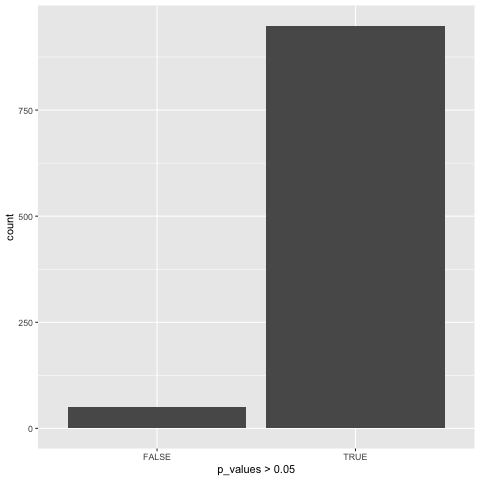

In [106]:
%%R

ggplot(p_values) + 
    aes(x=p_values > .05)+ 
    geom_bar()

In [117]:
%%R

install.packages('emojifont')

R[write to console]: Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘showtextdb’, ‘proto’, ‘showtext’, ‘sysfonts’


R[write to console]: trying URL 'https://mirrors.nics.utk.edu/cran/src/contrib/showtextdb_3.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 1989613 bytes (1.9 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R

checking for gcc... clang
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether clang accepts -g... yes
checking for clang option to accept ISO C89... none needed
checking for pkg-config... /opt/homebrew/bin/pkg-config
checking whether pkg-config could find zlib... yes
checking whether pkg-config could find libpng... yes
checking whether pkg-config could find freetype2... yes
checking whether freetype2 flags work... yes
configure: creating ./config.status
config.status: creating src/Makevars
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -I/opt/homebrew/opt/freetype/include/freetype2 -I/opt/homebrew/Cellar/libpng/1.6.39/include/libpng16   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew

** libs
ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.2/site-library/00LOCK-sysfonts/00new/sysfonts/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (sysfonts)
* installing *source* package ‘showtextdb’ ...
** package ‘showtextdb’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final loca

checking for gcc... clang
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether clang accepts -g... yes
checking for clang option to accept ISO C89... none needed
checking for pkg-config... /opt/homebrew/bin/pkg-config
checking whether pkg-config could find zlib... yes
checking whether pkg-config could find libpng... yes
checking whether pkg-config could find freetype2... yes
checking whether freetype2 flags work... yes
configure: creating ./config.status
config.status: creating src/Makevars
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -I/opt/homebrew/opt/freetype/include/freetype2 -I/opt/homebrew/Cellar/libpng/1.6.39/include/libpng16   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew

** libs


clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -I/opt/homebrew/opt/freetype/include/freetype2 -I/opt/homebrew/Cellar/libpng/1.6.39/include/libpng16   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -Wno-implicit-function-declaration  -c register_routines.c -o register_routines.o
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -I/opt/homebrew/opt/freetype/include/freetype2 -I/opt/homebrew/Cellar/libpng/1.6.39/include/libpng16   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -Wno-implicit-function-declaration  -c showtext.c -o showtext.o
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -I/opt/homebrew/opt/freetype/include/freetype2 -I/opt/homebrew/Cellar/libpng/1.6.39/include/libpng16   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt

ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.2/site-library/00LOCK-showtext/00new/showtext/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (showtext)
* installing *source* package ‘emojifont’ ...
** package ‘emojifont’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed

In [114]:
%%R

install.packages('ggtext')

R[write to console]: Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘markdown’, ‘png’, ‘jpeg’, ‘gridtext’


R[write to console]: trying URL 'https://mirrors.nics.utk.edu/cran/src/contrib/markdown_1.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 41683 bytes (40 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to con

clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   `libpng-config --cflags` -fPIC  -Wno-implicit-function-declaration  -c dummy.c -o dummy.o
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   `libpng-config --cflags` -fPIC  -Wno-implicit-function-declaration  -c read.c -o read.o
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   `libpng-config --cflags` -fPIC  -Wno-implicit-function-declaration  -c write.c -o write.o
clang -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/opt/homebrew/Cellar/r/

ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.2/site-library/00LOCK-png/00new/png/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (png)
* installing *source* package ‘jpeg’ ...
** package ‘jpeg’ successfully unpacked and MD5 sums checked
** using staged installation
** libs
ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.2/site-library/00LOCK-jpeg/00new/jpeg/libs
** R
** inst
** byte-compile and prepare package for lazy loading


clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -Wno-implicit-function-declaration  -c read.c -o read.o
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -Wno-implicit-function-declaration  -c reg.c -o reg.o
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG   -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -Wno-implicit-function-declaration  -c write.c -o write.o
clang -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/

** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (jpeg)
* installing *source* package ‘gridtext’ ...
** package ‘gridtext’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c RcppExports.cpp -o RcppExports.o


In file included from RcppExports.cpp:4:
In file included from ./gridtext_types.h:11:
In file included from ./layout.h:4:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead."

clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c bl-r-bindings.cpp -o bl-r-bindings.o


In file included from bl-r-bindings.cpp:1:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/sys/cdefs.h

clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c grid-renderer.cpp -o grid-renderer.o


In file included from grid-renderer.cpp:3:
In file included from ./grid-renderer.h:4:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTo

clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c grid.cpp -o grid.o


In file included from grid.cpp:1:
In file included from ./grid.h:4:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sd

clang++ -std=gnu++11 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/lib -L/opt/homebrew/opt/xz/lib -L/opt/homebrew/lib -o gridtext.so RcppExports.o bl-r-bindings.o grid-renderer.o grid.o -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -lR -lintl -Wl,-framework -Wl,CoreFoundation


** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (gridtext)
* installing *source* package ‘ggtext’ ...
** package ‘ggtext’ successfully unpacked and MD5 sums checked
** using staged installation
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggtext)
R[write to console]: 

R[write to console]: 
R[write to console]: The download

In [109]:
%%R

install.packages('ggforce')

R[write to console]: Installing package into ‘/opt/homebrew/lib/R/4.2/site-library’
(as ‘lib’ is unspecified)



--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Australia (Perth) [https]
 6: Austria [https]
 7: Belgium (Brussels) [https]
 8: Brazil (PR) [https]
 9: Brazil (RJ) [https]
10: Brazil (SP 1) [https]
11: Brazil (SP 2) [https]
12: Bulgaria [https]
13: Canada (MB) [https]
14: Canada (ON 3) [https]
15: Chile (Santiago) [https]
16: China (Beijing 2) [https]
17: China (Beijing 3) [https]
18: China (Hefei) [https]
19: China (Hong Kong) [https]
20: China (Guangzhou) [https]
21: China (Jinan) [https]
22: China (Lanzhou) [https]
23: China (Nanjing) [https]
24: China (Shanghai 2) [https]
25: China (Shenzhen) [https]
26: Colombia (Cali) [https]
27: Costa Rica [https]
28: Cyprus [https]
29: Czech Republic [https]
30: Denmark [https]
31: East Asia [https]
32: Ecuador (Cuenca) [https]
33: France (Lyon 1) [https]
34: France (Lyon 2) [https]


R[write to console]: also installing the dependencies ‘tweenr’, ‘polyclip’, ‘RcppEigen’


R[write to console]: trying URL 'https://mirrors.nics.utk.edu/cran/src/contrib/tweenr_2.0.2.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 583621 bytes (569 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to c

clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/cpp11/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c along.cpp -o along.o
clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/cpp11/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c at.cpp -o at.o
clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/cpp11/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c cpp11.cpp -o cpp11.o
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/si

ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.2/site-library/00LOCK-tweenr/00new/tweenr/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (tweenr)
* installing *source* package ‘polyclip’ ...
** package ‘polyclip’ successfully unpacked and MD5 sums checked
** using staged installation


compiling under C++11
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether clang++ -std=gnu++11 accepts -g... yes
Using PKG_CONFIG: pkg-config
Compiling against bundled copy of clipper library.
     In the clipper library, signed 64-bit integers (cInt)
     will be declared as 'signed long long'
     In the clipper library, unsigned 64-bit integers (cUInt)
     will be declared as 'unsigned long long'
configure: creating ./config.status
config.status: creating src/Makevars
clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -DPOLYCLIP_LONG64="signed long long" -DPOLYCLIP_ULONG64="unsigned long long"  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/inclu

** libs


clang++ -std=gnu++11 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG -DPOLYCLIP_LONG64="signed long long" -DPOLYCLIP_ULONG64="unsigned long long"  -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include  -g -O2 -fPIC  -g -O2  -c clipper.cpp -o clipper.o
clang++ -std=gnu++11 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/lib -L/opt/homebrew/opt/xz/lib -L/opt/homebrew/lib -o polyclip.so init.o interface.o clipper.o -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -lR -lintl -Wl,-framework -Wl,CoreFoundation


ld: warning: -undefined dynamic_lookup may not work with chained fixups
installing to /opt/homebrew/lib/R/4.2/site-library/00LOCK-polyclip/00new/polyclip/libs
** R
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (polyclip)
* installing *source* package ‘RcppEigen’ ...
** package ‘RcppEigen’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include  -I../inst/include -fPIC  -g -O2  -c RcppEigen.cpp -o RcppEigen.o


In file included from RcppEigen.cpp:22:
In file included from ../inst/include/RcppEigen.h:25:
In file included from ../inst/include/RcppEigenForward.h:26:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/MacOS

In file included from RcppEigen.cpp:22:
In file included from ../inst/include/RcppEigen.h:25:
In file included from ../inst/include/RcppEigenForward.h:35:
In file included from ../inst/include/unsupported/Eigen/KroneckerProduct:34:
../inst/include/unsupported/Eigen/../../Eigen/src/Core/util/ReenableStupidWarnings.h:14:30: warning: pragma diagnostic pop could not pop, no matching push [-Wunknown-pragmas]
    #pragma clang diagnostic pop
                             ^
In file included from RcppEigen.cpp:22:
In file included from ../inst/include/RcppEigen.h:25:
In file included from ../inst/include/RcppEigenForward.h:39:
In file included from ../inst/include/unsupported/Eigen/Polynomials:135:
../inst/include/unsupported/Eigen/../../Eigen/src/Core/util/ReenableStupidWarnings.h:14:30: warning: pragma diagnostic pop could not pop, no matching push [-Wunknown-pragmas]
    #pragma clang diagnostic pop
                             ^
In file included from RcppEigen.cpp:22:
In file included from 

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include  -I../inst/include -fPIC  -g -O2  -c RcppExports.cpp -o RcppExports.o


In file included from RcppExports.cpp:4:
In file included from ./../inst/include/RcppEigen.h:25:
In file included from ../inst/include/RcppEigenForward.h:26:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/Ma

In file included from RcppExports.cpp:4:
In file included from ./../inst/include/RcppEigen.h:25:
In file included from ../inst/include/RcppEigenForward.h:40:
In file included from ../inst/include/unsupported/Eigen/SparseExtra:51:
../inst/include/unsupported/Eigen/../../Eigen/src/Core/util/ReenableStupidWarnings.h:14:30: warning: pragma diagnostic pop could not pop, no matching push [-Wunknown-pragmas]
    #pragma clang diagnostic pop
                             ^
19 warnings generated.


clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include  -I../inst/include -fPIC  -g -O2  -c fastLm.cpp -o fastLm.o


In file included from fastLm.cpp:23:
In file included from ./fastLm.h:25:
In file included from ../inst/include/RcppEigen.h:25:
In file included from ../inst/include/RcppEigenForward.h:26:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Dev

In file included from fastLm.cpp:23:
In file included from ./fastLm.h:25:
In file included from ../inst/include/RcppEigen.h:25:
In file included from ../inst/include/RcppEigenForward.h:40:
In file included from ../inst/include/unsupported/Eigen/SparseExtra:51:
../inst/include/unsupported/Eigen/../../Eigen/src/Core/util/ReenableStupidWarnings.h:14:30: warning: pragma diagnostic pop could not pop, no matching push [-Wunknown-pragmas]
    #pragma clang diagnostic pop
                             ^
19 warnings generated.
ld: warning: -undefined dynamic_lookup may not work with chained fixups
ld: warning: could not create compact unwind for ___emutls_get_address: registers 23 and 24 not saved contiguously in frame
installing to /opt/homebrew/lib/R/4.2/site-library/00LOCK-RcppEigen/00new/RcppEigen/libs
** R
** inst


clang -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -Wno-implicit-function-declaration  -c init.c -o init.o
clang++ -std=gnu++14 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/lib -L/opt/homebrew/opt/xz/lib -L/opt/homebrew/lib -o RcppEigen.so RcppEigen.o RcppExports.o fastLm.o init.o -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -lRlapack -L/opt/homebrew/opt/openblas/lib -lopenblas -L/opt/homebrew/opt/gcc/lib/gcc/current/gcc/aarch64-apple-darwin22/12 -L/opt/homebrew/opt/gcc/lib/gcc/current/gcc -L/opt/homebrew/opt/gcc/lib/gcc/current -lgfortran -lemutls_w -lquadmath -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -lR -lintl -Wl

** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (RcppEigen)
* installing *source* package ‘ggforce’ ...
** package ‘ggforce’ successfully unpacked and MD5 sums checked
** using staged installation
** libs


clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.2/site-library/RcppEigen/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c RcppExports.cpp -o RcppExports.o


In file included from RcppExports.cpp:4:
In file included from /opt/homebrew/lib/R/4.2/site-library/RcppEigen/include/RcppEigen.h:25:
In file included from /opt/homebrew/lib/R/4.2/site-library/RcppEigen/include/RcppEigenForward.h:26:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that 

In file included from RcppExports.cpp:4:
In file included from /opt/homebrew/lib/R/4.2/site-library/RcppEigen/include/RcppEigen.h:25:
In file included from /opt/homebrew/lib/R/4.2/site-library/RcppEigen/include/RcppEigenForward.h:40:
In file included from /opt/homebrew/lib/R/4.2/site-library/RcppEigen/include/unsupported/Eigen/SparseExtra:51:
/opt/homebrew/lib/R/4.2/site-library/RcppEigen/include/unsupported/Eigen/../../Eigen/src/Core/util/ReenableStupidWarnings.h:14:30: warning: pragma diagnostic pop could not pop, no matching push [-Wunknown-pragmas]
    #pragma clang diagnostic pop
                             ^
19 warnings generated.


clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.2/site-library/RcppEigen/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c bSpline.cpp -o bSpline.o


In file included from bSpline.cpp:1:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/sys/cdefs.h:215:4

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.2/site-library/RcppEigen/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c bezier.cpp -o bezier.o


In file included from bezier.cpp:1:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/sys/cdefs.h:215:48

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.2/site-library/RcppEigen/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c deBoor.cpp -o deBoor.o
clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.2/site-library/RcppEigen/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c ellipseEnclose.cpp -o ellipseEnclose.o


In file included from ellipseEnclose.cpp:1:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/sys/cdefs.

19 warnings generated.


clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.2/site-library/RcppEigen/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c enclose.cpp -o enclose.o


In file included from enclose.cpp:1:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/sys/cdefs.h:215:4

clang++ -std=gnu++14 -I"/opt/homebrew/Cellar/r/4.2.2_1/lib/R/include" -DNDEBUG  -I'/opt/homebrew/lib/R/4.2/site-library/Rcpp/include' -I'/opt/homebrew/lib/R/4.2/site-library/RcppEigen/include' -I/opt/homebrew/opt/gettext/include -I/opt/homebrew/opt/readline/include -I/opt/homebrew/opt/xz/include -I/opt/homebrew/include   -fPIC  -g -O2  -c pointPath.cpp -o pointPath.o


In file included from pointPath.cpp:1:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp.h:27:
In file included from /opt/homebrew/lib/R/4.2/site-library/Rcpp/include/RcppCommon.h:168:
/opt/homebrew/lib/R/4.2/site-library/Rcpp/include/Rcpp/internal/r_coerce.h:255:7: warning: 'sprintf' is deprecated: This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead. [-Wdeprecated-declarations]
    ::sprintf(buff, "%02x", from);
      ^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/stdio.h:188:1: note: 'sprintf' has been explicitly marked deprecated here
__deprecated_msg("This function is provided for compatibility reasons only.  Due to security concerns inherent in the design of sprintf(3), it is highly recommended that you use snprintf(3) instead.")
^
/Library/Developer/CommandLineTools/SDKs/MacOSX.sdk/usr/include/sys/cdefs.h:215

clang++ -std=gnu++14 -dynamiclib -Wl,-headerpad_max_install_names -undefined dynamic_lookup -single_module -multiply_defined suppress -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -L/opt/homebrew/opt/gettext/lib -L/opt/homebrew/opt/readline/lib -L/opt/homebrew/opt/xz/lib -L/opt/homebrew/lib -o ggforce.so RcppExports.o bSpline.o bezier.o deBoor.o ellipseEnclose.o enclose.o pointPath.o -L/opt/homebrew/Cellar/r/4.2.2_1/lib/R/lib -lR -lintl -Wl,-framework -Wl,CoreFoundation


** help
*** installing help indices
*** copying figures
** building package indices
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (ggforce)
R[write to console]: 

R[write to console]: 
R[write to console]: The downloaded source packages are in
	‘/private/var/folders/x2/ld74q9c55_j9mn_p0hkl_0640000gn/T/RtmpPMKunU/downloaded_packages’
R[write to console]: 
R[write to console]: 



In [119]:
%%R

library(ggforce)
library(ggtext)
library(emojifont)

## Part 2 | Last Year's Polly (Anonymized)


### 👉 Question 2: Are Dhrumil's students more stressed than Irena's?

In [120]:
%%R

# read some functions from the functions.R file
source('functions.R')

## NULL HYPOTHESIS: Dhrumil's students are NOT more stressed than Irena's 

In [121]:
emotions_df = pd.read_csv('emotion.csv')
emotions_df

,date,user_id,choice_id,emoji,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,2,😍,emotion,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,1,🙂,emotion,Irena
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,1,🙂,emotion,Dhrumil
...,...,...,...,...,...,...
580,2022-01-21,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
581,2022-01-21,4716f7a2eee28bddd0e115f021642950,2,😍,emotion,Dhrumil
582,2022-01-21,8b728352298677976121c9bcf5f2a578,1,🙂,emotion,Irena
583,2022-01-21,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil


In [122]:
emotions_df.groupby('editor').choice_id.mean()

editor
Dhrumil    0.756667
Irena      0.635088
Name: choice_id, dtype: float64

In [123]:
%%R -o q_emotions

q_emotions <- read_csv('emotion.csv', show_col_types = FALSE) %>% 
        mutate(date=as.Date(date), 
        emoji = factor(emoji, levels=c('😍', '🙂', '😐', '🙁', '😢'))) 

q_emotions


# A tibble: 585 × 6
   date       user_id                          choice_id emoji question editor 
   <date>     <chr>                                <dbl> <fct> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 😍    emotion  Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         1 🙂    emotion  Dhrumil
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         2 😍    emotion  Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         1 🙂    emotion  Irena  
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         1 🙂    emotion  Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 😍    emotion  Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         2 😍    emotion  Dhrumil
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         0 😐    emotion  Dhrumil
 9 2022-05-13 89135d5c75496c9d94251f30c748b9b8        -2 😢    emotion  Irena  
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         2 😍    emotion  Dhrumil
# … with 575 more rows
# ℹ Use

In [124]:
%%R 

q_emotions_d = q_emotions %>% filter(editor=='Dhrumil')
q_emotions_i = q_emotions %>% filter(editor=='Irena')

t.test(q_emotions_d$choice_id, q_emotions_i$choice_id)


	Welch Two Sample t-test

data:  q_emotions_d$choice_id and q_emotions_i$choice_id
t = 1.7076, df = 582.95, p-value = 0.08825
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01825952  0.26141742
sample estimates:
mean of x mean of y 
0.7566667 0.6350877 



In [134]:
#There is no difference in stress levels between Dhrumil and Irena's students. Both sets of students are equally stressed. 

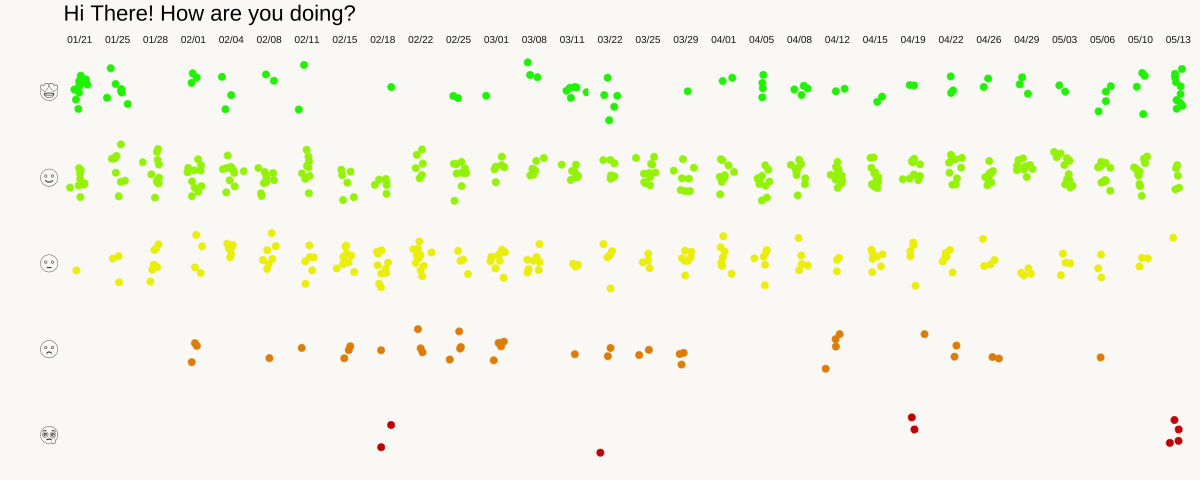

In [125]:
%%R -w 1200

plot_type_1(q_emotions)

In [126]:
q_emotions = pd.read_csv('emotion.csv', parse_dates=['date'])
q_emotions

,date,user_id,choice_id,emoji,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,2,😍,emotion,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,1,🙂,emotion,Irena
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,1,🙂,emotion,Dhrumil
...,...,...,...,...,...,...
580,2022-01-21,aa516cd83ca47c4c0707d31047f6dc8a,2,😍,emotion,Dhrumil
581,2022-01-21,4716f7a2eee28bddd0e115f021642950,2,😍,emotion,Dhrumil
582,2022-01-21,8b728352298677976121c9bcf5f2a578,1,🙂,emotion,Irena
583,2022-01-21,5a7ac9a0ee30d1e7bedafd9046162fc7,1,🙂,emotion,Dhrumil


In [127]:
# hint: try a pivot table (or a group by)

### 👉 Question 3: Do Dhrumil's students have a heavier workload than Irena's?

In [128]:
%%R 

q_workload <- read_csv('workload.csv', show_col_types = FALSE)
q_workload

# A tibble: 543 × 5
   date       user_id                          choice_id question editor 
   <date>     <chr>                                <dbl> <chr>    <chr>  
 1 2022-05-13 aa516cd83ca47c4c0707d31047f6dc8a         2 workload Dhrumil
 2 2022-05-13 5a7ac9a0ee30d1e7bedafd9046162fc7         4 workload Irena  
 3 2022-05-13 fb6da81da7c9b66f4dfd266096bca702         6 workload Dhrumil
 4 2022-05-13 f2dfc7b67a37987df95bd920a81a5cd3         3 workload Dhrumil
 5 2022-05-13 764f85855c5a57c62401a0834eda0fc9         4 workload Dhrumil
 6 2022-05-13 95ba860ed905cf268092ca1e90f91dd6         2 workload Irena  
 7 2022-05-13 3ce992bb73ea135b1c738ef290cb93d5         5 workload Irena  
 8 2022-05-13 c21a2438c0e9308e03a92ebd90c5d27d         4 workload Irena  
 9 2022-05-13 a9864a7d130ce52cf17579545fc96643         5 workload Dhrumil
10 2022-05-13 5119dd707d353a28b41fa1adcdda76be         1 workload Dhrumil
# … with 533 more rows
# ℹ Use `print(n = ...)` to see more rows


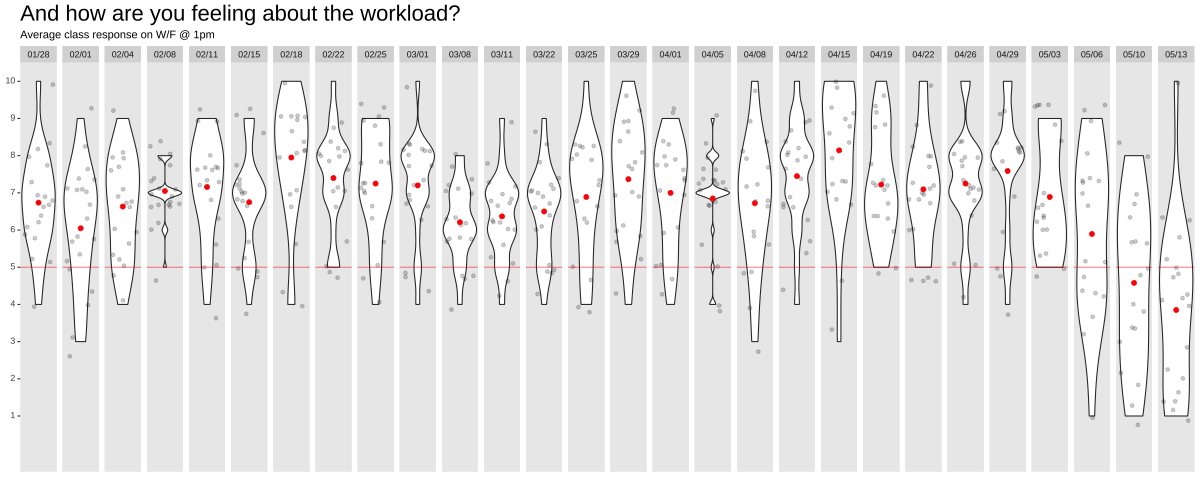

In [129]:
%%R -w 1200

# Data at a glance
plot_type_2(q_workload)

In [130]:
q_workload = pd.read_csv('workload.csv', parse_dates=['date'])
q_workload

,date,user_id,choice_id,question,editor
0,2022-05-13,aa516cd83ca47c4c0707d31047f6dc8a,2,workload,Dhrumil
1,2022-05-13,5a7ac9a0ee30d1e7bedafd9046162fc7,4,workload,Irena
2,2022-05-13,fb6da81da7c9b66f4dfd266096bca702,6,workload,Dhrumil
3,2022-05-13,f2dfc7b67a37987df95bd920a81a5cd3,3,workload,Dhrumil
4,2022-05-13,764f85855c5a57c62401a0834eda0fc9,4,workload,Dhrumil
...,...,...,...,...,...
538,2022-01-28,5119dd707d353a28b41fa1adcdda76be,6,workload,Dhrumil
539,2022-01-28,b049b7eae43713e6aca6320c57b3bb88,8,workload,Irena
540,2022-01-28,5a7ac9a0ee30d1e7bedafd9046162fc7,6,workload,Irena
541,2022-01-28,2ab5e1542adfb5cbd739a0e443d7408b,5,workload,Irena


In [131]:
# hint: try a pivot table (or a group by)

In [132]:
%%R 

dhrumil = q_workload %>% filter(editor=='Dhrumil')
irena = q_workload %>% filter(editor=='Irena')

t.test(dhrumil$choice_id, irena$choice_id)


	Welch Two Sample t-test

data:  dhrumil$choice_id and irena$choice_id
t = -1.4969, df = 498.05, p-value = 0.1351
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.52867962  0.07145615
sample estimates:
mean of x mean of y 
 6.658120  6.886731 



In [ ]:
#NULL HYPOTHESIS: Since the p-value is more than 0.05, the null hypothesis — that there is no difference in workload 
#between the two — is true 

# Pollster Ratings

### 👉 Question 4: Are Gubernatorial Polls More Accurate Than Senate Polls?

In [136]:
%%R

s_g_polls <- read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv', show_col_types = FALSE) %>% 
    filter(type_detail %in% c('Gov-G', 'Sen-G')) %>%
    filter(location != 'US')
    
s_g_polls


# A tibble: 4,014 × 33
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G   Sen-G   Garin-…     113
 6   26255     31495    1741  1998 1998… OH      Sen-G   Sen-G   Univer…     346
 7   54202     87738    1435  1998 1998… AZ      Gov-G   Gov-G   Behavi…      27
 8   54291     87827    1443  1998 1998… IL      Gov-G   Gov-G   WCIA-TV     373
 9   54273     87809    1444  1998 1998… IA      Gov-G   Gov-G   Drake …     329
10   54346     87882    1451  1998 1998… NE      Gov-G   Gov-G   Mason-…     197
# … w

In [138]:
%%R -w 1000

mean_bias <- s_g_polls %>% 
filter(!is.na(bias)) %>%
    group_by(type_detail) %>% 
    summarise(bias=mean(bias))
mean_bias

# A tibble: 2 × 2
  type_detail  bias
  <chr>       <dbl>
1 Gov-G       0.468
2 Sen-G       0.137


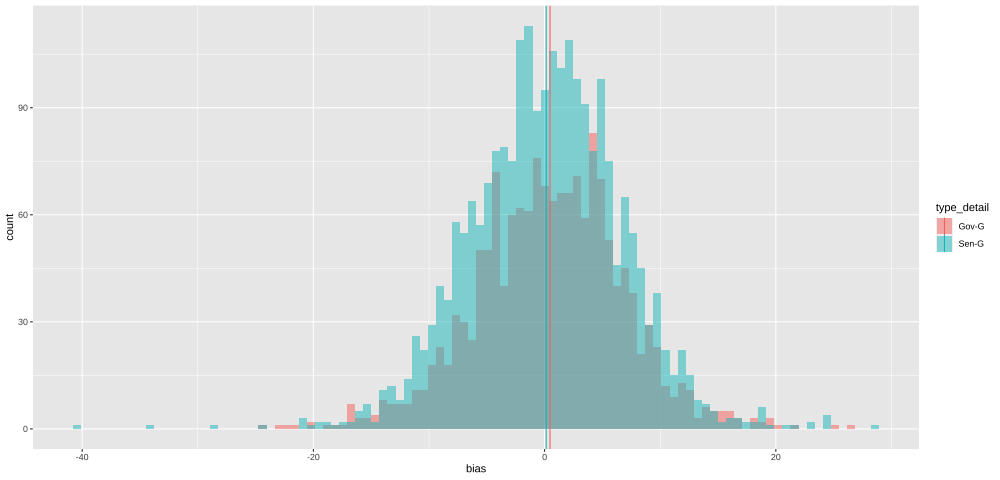

In [139]:
%%R -w 1000

ggplot(s_g_polls) +
    aes(x=bias, fill=type_detail) +
    geom_histogram(alpha=.5, bins=100, position='identity') +
    geom_vline(data=mean_bias, aes(xintercept=bias, color=type_detail))

In [140]:
s_g_polls = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/pollster-ratings/raw-polls.csv') \
    .query("type_detail.isin(['Gov-G', 'Sen-G'])")\
    .query("location!='US'")           

s_g_polls

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,...,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,error,bias,rightcall,advancedplusminus,comment
0,26013,87909,1455,1998,1998_Gov-G_NY,NY,Gov-G,Gov-G,Blum & Weprin Associates,32,...,-31.0,11/3/1998,33.16,54.32,-21.15,9.85,-9.85,1.0,1.461561,for New York Daily News | WABC-TV (New York)
1,26255,87926,1456,1998,1998_Gov-G_OH,OH,Gov-G,Gov-G,University of Cincinnati (Ohio Poll),346,...,-15.0,11/3/1998,44.69,50.05,-5.36,9.64,-9.64,1.0,4.285789,NaN
2,26026,31266,1736,1998,1998_Sen-G_NV,NV,Sen-G,Sen-G,FM3 Research,91,...,5.0,11/3/1998,47.86,47.77,0.09,4.91,4.91,1.0,-1.023784,for unspecified Democratic sponsor
3,26013,31253,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Blum & Weprin Associates,32,...,-8.0,11/3/1998,54.62,44.08,10.54,18.54,-18.54,0.0,10.064104,for New York Daily News | WABC-TV (New York)
4,63632,117103,1738,1998,1998_Sen-G_NY,NY,Sen-G,Sen-G,Garin-Hart-Yang Research Group,113,...,4.0,11/3/1998,54.62,44.08,10.54,6.54,-6.54,1.0,-1.972391,for Charles E. Schumer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10725,72624,136296,6280,2020,2020_Sen-G_MI,MI,Sen-G,Sen-G,Research Co.,449,...,15.0,11/3/2020,49.90,48.22,1.69,13.31,13.31,1.0,8.305356,NaN
10726,72625,136297,6281,2020,2020_Sen-G_MN,MN,Sen-G,Sen-G,Research Co.,449,...,11.0,11/3/2020,48.74,43.50,5.24,5.76,5.76,1.0,1.249939,NaN
10727,72626,136298,6287,2020,2020_Sen-G_NJ,NJ,Sen-G,Sen-G,Research Co.,449,...,23.0,11/3/2020,57.23,40.92,16.31,6.69,6.69,1.0,0.357477,NaN
10728,72864,140394,6292,2020,2020_Sen-G_SC,SC,Sen-G,Sen-G,Optimus,245,...,-9.8,11/3/2020,44.17,54.44,-10.27,0.47,0.47,1.0,-6.938997,NaN


In [142]:
%%R 

sen_polls = s_g_polls %>% filter(type_detail=='Sen-G')
gov_polls = s_g_polls %>% filter(type_detail=='Gov-G')

In [144]:
%%R 
t.test(sen_polls$error, gov_polls$error)


	Welch Two Sample t-test

data:  sen_polls$error and gov_polls$error
t = 0.26007, df = 3519.5, p-value = 0.7948
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2239094  0.2923943
sample estimates:
mean of x mean of y 
 5.143365  5.109123 



In [145]:
#Null hypothesis = Accuracy level is the same
#We don't reject the null hypothesis because the p-value is more than 0.05
#So we say that they could have the same accuracy level. 